In [1]:
import sympy
import random
import time
from scipy.special import lambertw
import numpy as np


def egcd(a, b):
    x,y, u,v = 0,1, 1,0
    while a != 0:
        q, r = b//a, b%a
        m, n = x-u*q, y-v*q
        b,a, x,y, u,v = a,r, u,v, m,n
    return b, x, y

def mod_inverse(a, m):
    g, x, _ = egcd(a, m)
    if g != 1:
        return None  
    else:
        return x % m

def padding(plain_text,block_size):
    plain_text += '0'*(block_size-len(plain_text))
    return plain_text

def chunkstring(string, length):
    return list(string[0+i:length+i] for i in range(0, len(string), length))

def Rotate(lists, num): # Right is default
    output_list = []       
    for item in range(len(lists) - num, len(lists)): 
        output_list.append(lists[item])       
    for item in range(0, len(lists) - num):  
        output_list.append(lists[item]) 
    return output_list 

def evolve_primes_list(sample,shift_factor):
    right = sample[len(sample)//2+1:]
    left = sample[:len(sample)//2]
    rotated_right = Rotate(right,num=shift_factor%len(right))
    rotated_left = Rotate(left,num=len(left)-(shift_factor%len(left)))
    rotated_left.append(sample[len(sample)//2])
    final = rotated_left + rotated_right
    return final

def calculate_blocksize(n):
    num = int(np.sqrt(n))
    if num**2<n**2:
        return int(np.sqrt(num**2))
    else:
        return(-1)

def get_prime_list_permutations(prime_list,num_blocks):
    primes_list_permutations = []
    for shift_factor in range(num_blocks):
        temp = evolve_primes_list(prime_list,shift_factor%len(prime_list))
        if shift_factor > num_blocks//2:
            temp = temp[:num_blocks//2+shift_factor]
        # print(temp)
        primes_list_permutations.append(temp)
    return primes_list_permutations


In [2]:
m_vals = [1,2,4,8,16,32,64]

In [3]:
epochs = 5
t_lst = []
for i in range(1,epochs+1):
    plaintext = 'abcdefghij'*(10**i)
    temp_t = []
    for m in m_vals:
        blocksize = calculate_blocksize(len(plaintext))
        if blocksize%2 == 0:
            blocksize -= 1
        
        plain_text_chunks = []
        if len(plaintext) < blocksize:
            plain_text_chunks.append(padding(plaintext,blocksize))
        else:
            chunks = chunkstring(plaintext,blocksize)
            for i in range(len(chunks)):
                plain_text_chunks.append(padding(chunks[i],blocksize))
        ascii_chunks = []
        for chunk in plain_text_chunks:
            t = []
            for i in chunk:
                t.append(ord(i))
            ascii_chunks.append(t)
        num_blocks = len(ascii_chunks)

        # Fixing the value of q based on blocksize using prime number theory
        n = np.exp(-lambertw(-1/blocksize,k=-1))
        n = int(n.real)
        q = sympy.ntheory.generate.nextprime(n,ith=1)
#         print(blocksize)
        prime_list = []
        count = 0
        while True:
            if count == blocksize:
                break
            p = sympy.prime(random.randint(1,blocksize))
            if p not in prime_list and mod_inverse(p,q**m)!=None:
                prime_list.append(p)
                count += 1
#         print(prime_list)
        prime_list_permutations = get_prime_list_permutations(prime_list,num_blocks)

        t1 = time.time()

        encrypted_cipher = []
        for chunk in range(len(ascii_chunks)):
            cipher = []
            for c in range(len(ascii_chunks[chunk])):
                cipher.append((ascii_chunks[chunk][c]*prime_list_permutations[chunk][c])%(q**m))
            encrypted_cipher.append(cipher)

        # print('\nDecrypted : ')
        decrypted_ascii_chunks = []
        for chunk in range(len(encrypted_cipher)):
            temp_ascii = []
            for k in range(len(encrypted_cipher[chunk])):
                temp_ascii.append((encrypted_cipher[chunk][k]*mod_inverse(prime_list_permutations[chunk][k],q**m))%q**m)
            decrypted_ascii_chunks.append(temp_ascii)
        # print(decrypted_ascii_chunks)

        decrypted_text_list = []
        for chunk in decrypted_ascii_chunks:
            for i in chunk:
                if chr(i)!='0':
                    decrypted_text_list.append(chr(i))

        runtime = time.time()-t1
        print(runtime)
        temp_t.append(runtime)
    t_lst.append(temp_t)
    

0.00018262863159179688
0.00021719932556152344
0.00018358230590820312
0.00023412704467773438
0.0002532005310058594
0.0002651214599609375
0.0002911090850830078
0.0017762184143066406
0.0018706321716308594
0.001932382583618164
0.0020182132720947266
0.002272367477416992
0.0024521350860595703
0.002931833267211914
0.02127838134765625
0.022760629653930664
0.024544239044189453
0.024953365325927734
0.02634453773498535
0.02937912940979004
0.0362398624420166
0.2428293228149414
0.24626803398132324
0.2703723907470703
0.28620481491088867
0.3108189105987549
0.34398651123046875
0.4249420166015625
2.659255027770996
2.7299513816833496
3.032794713973999
3.140226125717163
3.3949337005615234
3.8855950832366943
4.827055215835571


In [4]:
print('Stringlength     1       2      4      8      16      32       64')
time_m_1 = []
time_m_2 = []
time_m_4 = []
time_m_8 = []
time_m_16 = []
time_m_32 = []
time_m_64 = []

for t in range(len(t_lst)):
    time_m_1.append(t_lst[t][0])
    time_m_2.append(t_lst[t][1])
    time_m_4.append(t_lst[t][2])
    time_m_8.append(t_lst[t][3])
    time_m_16.append(t_lst[t][4])
    time_m_32.append(t_lst[t][5])
    time_m_64.append(t_lst[t][6])
    print('10^'+str(t+1)+'\t\t\t'+str(round(t_lst[t][0],3))+'\t\t'+str(round(t_lst[t][1],3))+'\t\t'+str(round(t_lst[t][2],3)))

Stringlength     1       2      4      8      16      32       64
10^1			0.0		0.0		0.0
10^2			0.002		0.002		0.002
10^3			0.021		0.023		0.025
10^4			0.243		0.246		0.27
10^5			2.659		2.73		3.033


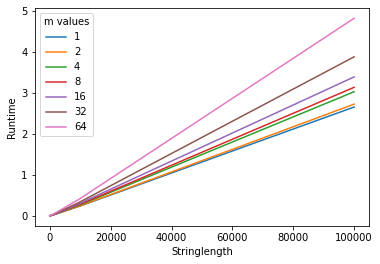

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline

x = []
for i in range(1,epochs+1):
    x.append(10**i)

plt.plot(x, time_m_1,'-', label ="1") 
plt.plot(x, time_m_2, '-', label ="2")
plt.plot(x, time_m_4, '-', label ="4")
plt.plot(x, time_m_8,'-', label ="8") 
plt.plot(x, time_m_16, '-', label ="16")
plt.plot(x, time_m_32, '-', label ="32")
plt.plot(x, time_m_64,'-', label ="64") 

#plt.title('Stringlength vs runtime')
plt.xlabel('Stringlength')
plt.ylabel('Runtime')
plt.legend(loc="best",title="m values")